In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

# Check the first five rows of the dataset
print(data.head())

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


In [3]:
!pip install seaborn
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195814 sha256=3df1376f7562d903c979b48d9c189435e011dadd99ee348afc9724838666f2c1
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [4]:
# Check the basic statistics of the dataset
print(data.describe())

            user_id        item_id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08


In [5]:
# Check the data types of the columns
print(data.dtypes)

user_id      int64
item_id      int64
rating       int64
timestamp    int64
dtype: object


In [6]:
# Check the missing values in the dataset
print(data.isnull().sum())

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64


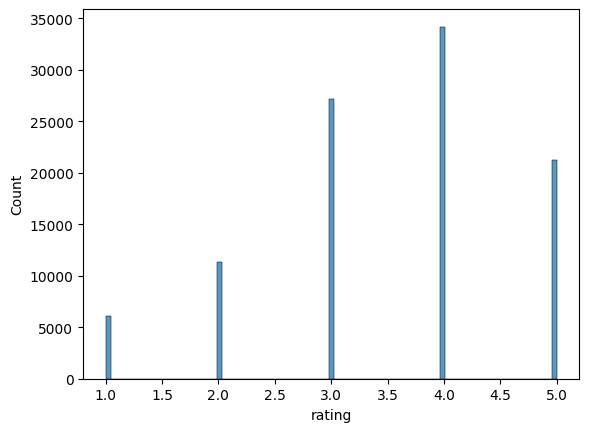

In [7]:
# Check the distribution of the target variable
sns.histplot(data.rating)
plt.show()

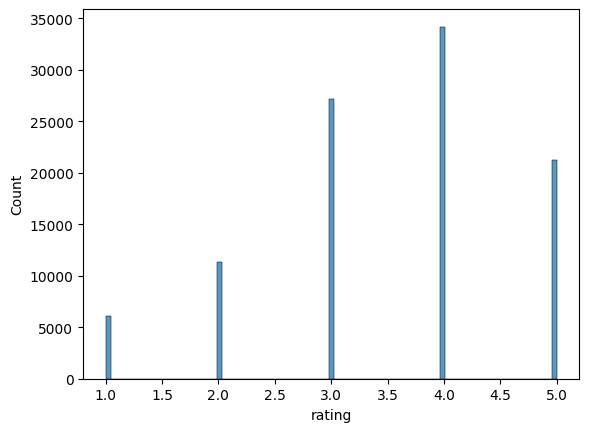

In [8]:
# Check the distribution of the target variable
sns.histplot(data.rating)
plt.show()

In [9]:
# Remove the timestamp column
data.drop('timestamp', axis=1, inplace=True)

In [10]:
# Check the unique values of the user_id and item_id
n_users = len(data.user_id.unique())
n_items = len(data.item_id.unique())

print('Number of users:', n_users)
print('Number of items:', n_items)

Number of users: 943
Number of items: 1682


In [11]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [12]:
# Create a user-item matrix
train_matrix = np.zeros((n_users, n_items))

for row in train_data.itertuples():
    train_matrix[row[1]-1, row[2]-1] = row[3]

In [13]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

# Load the dataset into the Surprise framework
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['user_id', 'item_id', 'rating']], reader)

# Use the SVD algorithm
algo = SVD()

# Evaluate the algorithm using cross-validation
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9309  0.9371  0.9393  0.9363  0.9384  0.9364  0.0029  
MAE (testset)     0.7326  0.7393  0.7401  0.7392  0.7397  0.7382  0.0028  
Fit time          1.41    1.41    1.82    1.72    1.37    1.55    0.19    
Test time         0.15    0.25    0.24    0.15    0.25    0.21    0.05    


{'test_rmse': array([0.93094102, 0.93707689, 0.93931116, 0.93629783, 0.93836614]),
 'test_mae': array([0.7325964 , 0.73926307, 0.74009306, 0.73916046, 0.7397395 ]),
 'fit_time': (1.4063141345977783,
  1.4131004810333252,
  1.8212101459503174,
  1.7154028415679932,
  1.3715400695800781),
 'test_time': (0.14972305297851562,
  0.25066208839416504,
  0.2391660213470459,
  0.14664816856384277,
  0.25367069244384766)}

In [19]:
# Load the movies dataset
movies = pd.read_csv('/u.item', sep='|', encoding='latin-1', header=None, names=['item_id', 'title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

# Remove unnecessary columns
movies.drop(['release_date', 'video_release_date', 'imdb_url'], axis=1, inplace=True)

In [20]:
# Create a movie-genre matrix
movie_genre_matrix = movies.iloc[:, 6:].values

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the pairwise cosine similarity between movies
movie_similarity_matrix = cosine_similarity(movie_genre_matrix)

In [22]:
# Get the index of the movie
movie_index = movies[movies['title'] == 'Toy Story (1995)'].index.values[0]

# Get the pairwise similarity scores for the given movie
movie_similarity_scores = list(enumerate(movie_similarity_matrix[movie_index]))

# Sort the movies based on the similarity scores
sorted_movie_similarity_scores = sorted(movie_similarity_scores, key=lambda x: x[1], reverse=True)

# Get the top 10 similar movies
top_10_similar_movies = sorted_movie_similarity_scores[1:11]

# Print the top 10 similar movies
for i, score in top_10_similar_movies:
    print(movies.iloc[i]['title'])

Santa Clause, The (1994)
Home Alone (1990)
D3: The Mighty Ducks (1996)
Love Bug, The (1969)
Willy Wonka and the Chocolate Factory (1971)
101 Dalmatians (1996)
Jungle2Jungle (1997)
George of the Jungle (1997)
Air Bud (1997)
Heavyweights (1994)


In [24]:
from surprise import Dataset, Reader
from surprise import KNNBasic
from surprise import accuracy
from surprise.model_selection import train_test_split

# Load the dataset
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file('u.data', reader=reader)

# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25)

# Train the model
model = KNNBasic()
model.fit(trainset)

# Make predictions on the testing set
predictions = model.test(testset)

# Compute the RMSE and MAE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f'RMSE: {rmse}, MAE: {mae}')

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9791
MAE:  0.7737
RMSE: 0.9791158220055713, MAE: 0.773733685739921
